In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.spatial.distance as scipydist


In [ ]:
path=""

(118, 2)


139.9560510536554

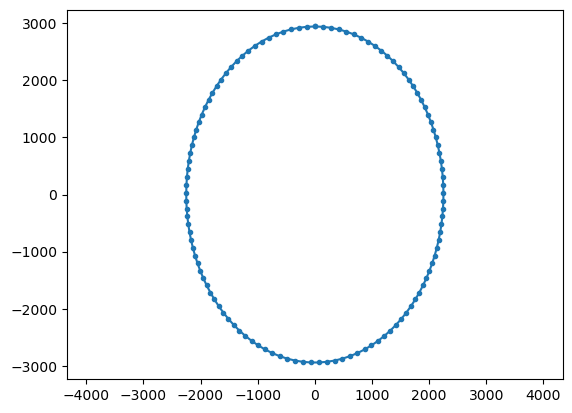

In [ ]:
z0=2925
davg=140 ## shift per unit

ix=abs(pos[:,2]-z0)<2
pp=pos[ix,:3].copy()
plt.plot(pp[:,0], pp[:,1], '.')
plt.axis('equal')
print(np.max(pp, axis=0))
## x^2/a^2 + y^2/b^2 + z^2/c^2 = 1
n=3140
ra=2250
rb=2940
rc=1400
theta=np.arange(n)/n*np.pi*2
x=np.sin(theta)*ra
y=np.cos(theta)*rb
p=np.vstack([x,y]).T
p=np.vstack([p, p[0]])
d=np.linalg.norm(np.diff(p, axis=0), axis=1)
d=np.append(0, np.cumsum(d))
func=interp1d(d, p.T, kind='linear')
dn=np.ceil(np.max(d)/davg)
di=np.arange(dn+1)/dn*np.max(d)
p=func(di).T

plt.plot(p[:,0],p[:,1], '.-')
print(p.shape)

np.mean(np.linalg.norm(np.diff(p, axis=0), axis=1))

52

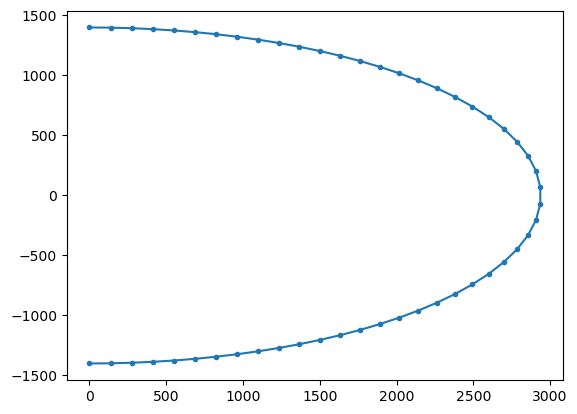

In [ ]:

theta=np.arange(n+1)/n*np.pi
x=np.sin(theta)*rb
y=np.cos(theta)*rc

p=np.vstack([x,y]).T
d=np.linalg.norm(np.diff(p, axis=0), axis=1)
d=np.append(0, np.cumsum(d))
func=interp1d(d, p.T, kind='linear')
dn=np.ceil(np.max(d)/davg)
di=np.arange(dn+1)/dn*np.max(d)
p=func(di).T

plt.plot(p[:,0],p[:,1], '.-')
np.mean(np.linalg.norm(np.diff(p, axis=0), axis=1))
pz0=pz=p[::-1].copy()
len(pz)

(3402, 4)

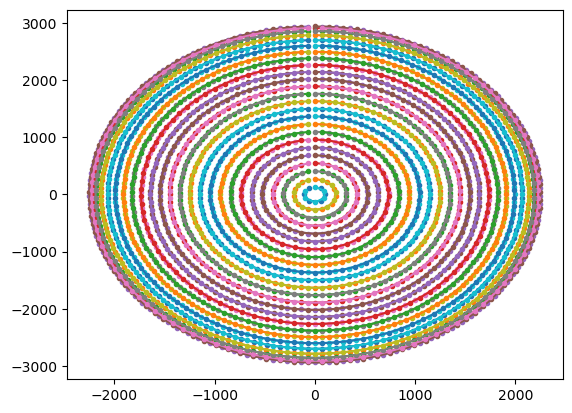

In [ ]:
pall=[]
for iz in range(1, len(pz)-1):
    zr=pz[iz,0]/np.max(pz[:,0])
    z=pz[iz,1]
    theta=np.arange(n)/n*np.pi*2
    x=np.sin(theta)*ra*zr
    y=np.cos(theta)*rb*zr
    p=np.vstack([x,y]).T
    p=np.vstack([p, p[0]])
    d=np.linalg.norm(np.diff(p, axis=0), axis=1)
    d=np.append(0, np.cumsum(d))
    func=interp1d(d, p.T, kind='linear')
    dn=np.ceil(np.max(d)/davg)
    di=(np.arange(dn)+.5*(iz%2))/dn*np.max(d)
    p=func(di).T

    plt.plot(p[:,0],p[:,1], '.-')
    
    if iz==0: alt=p[:,0]*0
    else: 
        # dr=np.linalg.norm(p[:,:2], axis=1)
        # alt=np.arctan2(z,dr)*180/np.pi
        alt=np.zeros(len(p))+np.arctan2(pz[iz+1,1]-pz[iz-1,1], pz[iz+1,0]-pz[iz-1,0])*180/np.pi-90
    
    pa=np.hstack([p, z+np.zeros((len(p),1)), alt[:,None]])
    # print(pa.shape, zr, np.mean(np.linalg.norm(np.diff(p, axis=0), axis=1)), np.mean(alt))
    
    pall.append(pa)
    
pall=np.vstack(pall)
pall[:,2]+=z0

np.savetxt("/mnt/c/Users/g5v99/Desktop/p22/membrane_new.txt", pall)
pall.shape

63

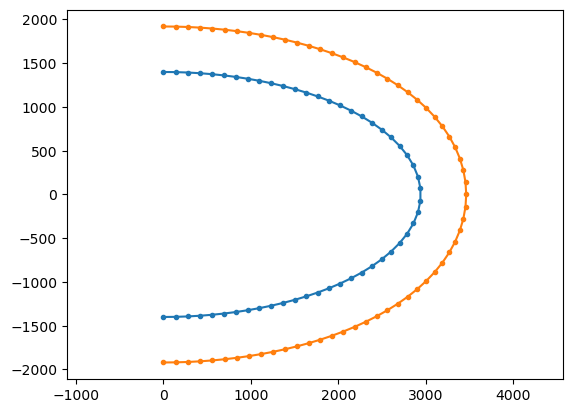

In [ ]:
plt.plot(pz0[:,0], pz0[:,1],'.-')

dr=520

theta=np.arange(n+1)/n*np.pi
x=np.sin(theta)*rb
y=np.cos(theta)*rc

p=np.vstack([x,y]).T
v=p[2:]-p[:-2]
v/=np.linalg.norm(v, axis=1)[:,None]
v=np.vstack([-v[:,1], v[:,0]]).T
v=np.vstack([[0,1], v, [0,-1]])
p+=v*dr
d=np.linalg.norm(np.diff(p, axis=0), axis=1)
d=np.append(0, np.cumsum(d))
func=interp1d(d, p.T, kind='linear')
dn=np.ceil(np.max(d)/davg)
di=np.arange(dn+1)/dn*np.max(d)
p=func(di).T

plt.plot(p[:,0],p[:,1], '.-')
np.mean(np.linalg.norm(np.diff(p, axis=0), axis=1))
pz1=pz=p[::-1].copy()
plt.axis('equal')
len(pz)

(5083, 4)

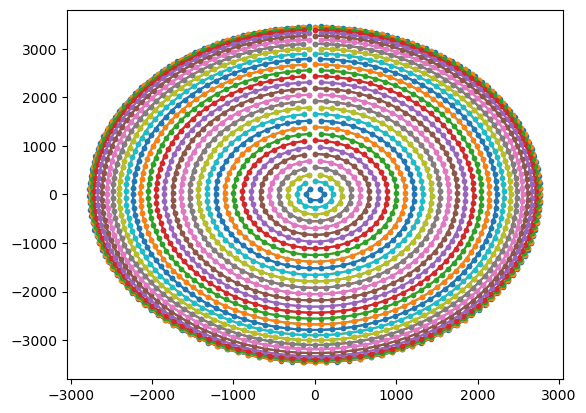

In [ ]:
pall=[]
for iz in range(1,len(pz)-1):
    zr=pz[iz,0]/np.max(pz[:,0])
    z=pz[iz,1]
    theta=np.arange(n)/n*np.pi*2
    x=np.sin(theta)*(ra+dr)*zr
    y=np.cos(theta)*(rb+dr)*zr
    p=np.vstack([x,y]).T
    p=np.vstack([p, p[0]])

    
    
    d=np.linalg.norm(np.diff(p, axis=0), axis=1)
    d=np.append(0, np.cumsum(d))
    func=interp1d(d, p.T, kind='linear')
    dn=np.ceil(np.max(d)/davg)
    di=(np.arange(dn)+.5*(iz%2))/dn*np.max(d)
    p=func(di).T

    plt.plot(p[:,0],p[:,1], '.-')
    
    if iz==0: alt=p[:,0]*0
    else: 
        # dr=np.linalg.norm(p[:,:2], axis=1)
        # alt=np.arctan2(z,dr)*180/np.pi
        alt=np.zeros(len(p))+np.arctan2(pz[iz+1,1]-pz[iz-1,1], pz[iz+1,0]-pz[iz-1,0])*180/np.pi-90
    
    pa=np.hstack([p, z+np.zeros((len(p),1)), alt[:,None]])
    # print(pa.shape, zr, np.mean(np.linalg.norm(np.diff(p, axis=0), axis=1)), np.mean(alt))
    
    pall.append(pa)
    
pall=np.vstack(pall)
pall[:,2]+=z0

np.savetxt(f"{path}/membrane_new.txt", pall)
pall.shape

59

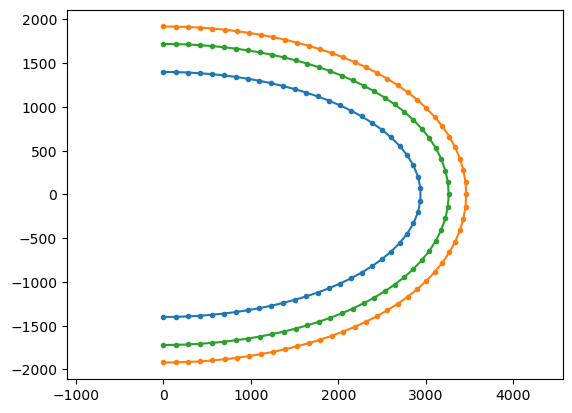

In [ ]:
plt.plot(pz0[:,0], pz0[:,1],'.-')
plt.plot(pz1[:,0], pz1[:,1],'.-')

dr=320

theta=np.arange(n+1)/n*np.pi
x=np.sin(theta)*rb
y=np.cos(theta)*rc

p=np.vstack([x,y]).T
v=p[2:]-p[:-2]
v/=np.linalg.norm(v, axis=1)[:,None]
v=np.vstack([-v[:,1], v[:,0]]).T
v=np.vstack([[0,1], v, [0,-1]])
p+=v*dr
d=np.linalg.norm(np.diff(p, axis=0), axis=1)
d=np.append(0, np.cumsum(d))
func=interp1d(d, p.T, kind='linear')
dn=np.ceil(np.max(d)/davg)
di=np.arange(dn+1)/dn*np.max(d)
p=func(di).T

plt.plot(p[:,0],p[:,1], '.-')
np.mean(np.linalg.norm(np.diff(p, axis=0), axis=1))
pz2=pz=p[::-1].copy()
plt.axis('equal')
len(pz)

(4414, 4)

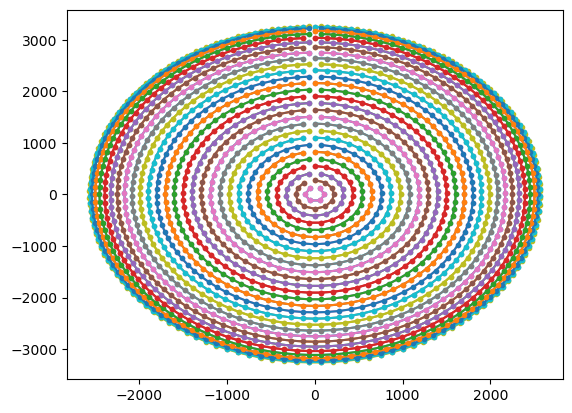

In [ ]:
pall=[]
for iz in range(1,len(pz)-1):
# for iz in range(30,33):
    zr=pz[iz,0]/np.max(pz[:,0])
    z=pz[iz,1]
    theta=np.arange(n)/n*np.pi*2
    x=np.sin(theta)*(ra+dr)*zr
    y=np.cos(theta)*(rb+dr)*zr
    p=np.vstack([x,y]).T
    p=np.vstack([p, p[0]])

    
    
    d=np.linalg.norm(np.diff(p, axis=0), axis=1)
    d=np.append(0, np.cumsum(d))
    func=interp1d(d, p.T, kind='linear')
    dn=np.ceil(np.max(d)/davg)
    di=(np.arange(dn)+.5*(iz%2))/dn*np.max(d)
    p=func(di).T

    plt.plot(p[:,0],p[:,1], '.-')
    
    if iz==0: alt=p[:,0]*0
    else: 
        # dr=np.linalg.norm(p[:,:2], axis=1)
        # alt=np.arctan2(z,dr)*180/np.pi
        alt=np.zeros(len(p))+np.arctan2(pz[iz+1,1]-pz[iz-1,1], pz[iz+1,0]-pz[iz-1,0])*180/np.pi-90
    
    pa=np.hstack([p, z+np.zeros((len(p),1)), alt[:,None]])
    # print(pa.shape, zr, np.mean(np.linalg.norm(np.diff(p, axis=0), axis=1)), np.mean(alt))
    
    pall.append(pa)
    
pall=np.vstack(pall)
pall[:,2]+=z0

np.savetxt(f"{path}/membrane_new.txt", pall)
pall.shape

In [49]:
pall=np.zeros((len(p),6))
pall[:,0]=p[:,0]
pall[:,1]=p[:,1]
pall[:,2]=z0
np.savetxt(f"{path}/membrane_new.txt", pall)
pall.shape

(118, 6)